# Tutorial based on ['Pyplot tutorial' from matplotlib offical guide](https://matplotlib.org/stable/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py)

## Intro to pyplot

`matplotlib.pyplot` is a collection of functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.

In `matplotlib.pyplot` various states are preserved across function calls, so that it keeps track of things like the current figure and plotting area, and the plotting functions are directed to the current axes (please note that "axes" here and in most places in the documentation refers to the axes part of a figure and not the strict mathematical term for more than one axis).


> **Note**

> pyplot API is generally _less-flexible than_ the object-oriented API. Most of the function calls you see here can also be called as methods from an Axes object. We recommend browsing the tutorials and examples to see how this works.

In [33]:
# preparing
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Text(0, 0.5, 'numbers')

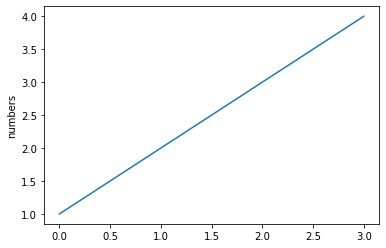

In [12]:
# simple visualizations with pyplot
plt.plot([1, 2, 3, 4])
plt.ylabel('numbers')

Why y-axis start with 1..4? and x-axis start with 0..3? 

If you provide a single list or array to plot, **matplotlib assumes it is a sequence of y values, and automatically generates the x values for you**. Since python ranges start with 0, the default x vector has the same length as y but starts with 0. Hence the x data are [0, 1, 2, 3].

> matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)

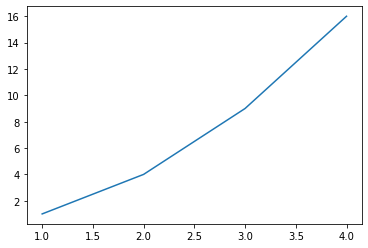

In [16]:
#plot is a versatile function, and will take an arbitrary number of arguments. For example, to plot x versus y, you can write:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

## Formatting the style of your plot

For every x, y pair of arguments, there is an optional third argument which is the format string that indicates the color and line type of the plot.  The default format string is 'b-', which is a solid blue line. For example, to plot the above with red circles, you would issue

(0.0, 6.0, 0.0, 20.0)

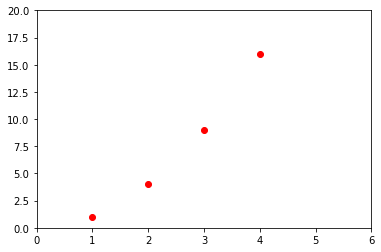

In [32]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')

# size of grid by x and y axes
plt.axis([0, 6, 0, 20])

#eqv of plt.axis
# plt.xlim(0, 6)
# plt.ylim(0, 20)

The axis function in the example above takes a list of [xmin, xmax, ymin, ymax] and specifies the viewport of the axes.

If matplotlib were limited to working with lists, it would be fairly useless for numeric processing. Generally, you will use numpy arrays. In fact, all sequences are converted to numpy arrays internally. The example below illustrates plotting several lines with different format styles in one function call using arrays.

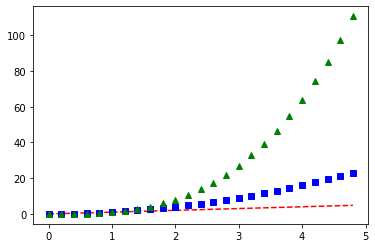

In [35]:
# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')


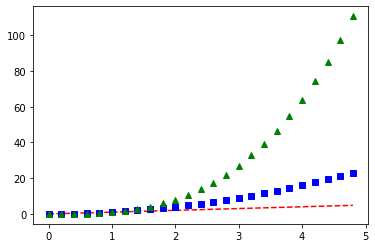

In [37]:
# eqv
t = np.arange(0., 5., 0.2)

plt.plot(t, t, 'r--')
plt.plot(t, t**2, 'bs')
plt.plot(t, t**3, 'g^')

## Plotting with keyword strings

There are some instances where you have data in a format that lets you access particular variables with strings. For example, with `numpy.recarray` or `pandas.DataFrame`.



In [46]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

Text(0, 0.5, 'entry b')

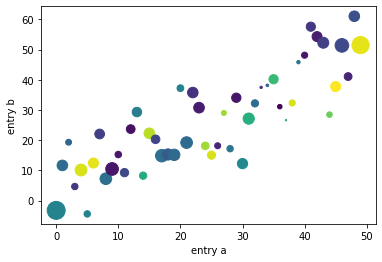

In [50]:
# scatter plot
plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')

## Plotting with categorical variables

It is also possible to create a plot using categorical variables. Matplotlib allows you to pass categorical variables directly to many plotting functions. For example:

> matplotlib.pyplot.subplot(*args, **kwargs)

Add an Axes to the current figure or retrieve an existing Axes.

Text(0.5, 0.98, 'Categorical Plotting')

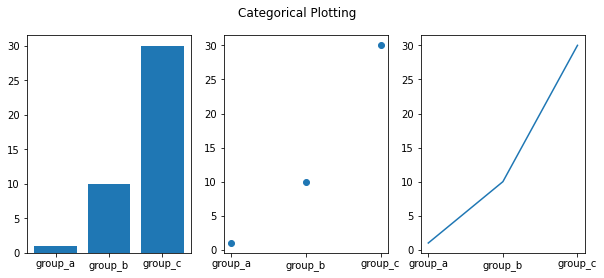

In [81]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 30]

# size of figure
plt.figure(figsize=(10, 4))


plt.subplot(131)
# bar plot
plt.bar(names, values)
plt.subplot(132)
#scatter plot
plt.scatter(names, values)
plt.subplot(133)

# plot
plt.plot(names, values)

# title for all subplots
plt.suptitle('Categorical Plotting')

## Controlling line properties


Lines have many attributes that you can set: linewidth, dash style, antialiased, etc; [see matplotlib.lines.Line2D](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D). There are several ways to set line properties

1. Use keyword args:

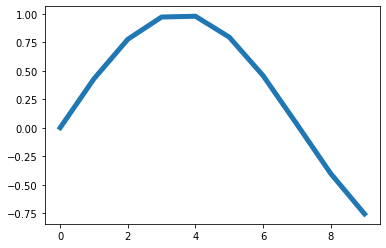

In [84]:
x = np.arange(10)
y = np.sin(np.linspace(0,4, 10))

plt.plot(x, y, linewidth=5.0)

2. Use the setter methods of a Line2D instance. plot returns a list of Line2D objects; e.g., line1, line2 = plot(x1, y1, x2, y2). In the code below we will suppose that we have only one line so that the list returned is of length 1. We use tuple unpacking with line, to get the first element of that list:

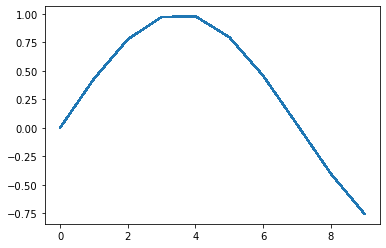

In [85]:
line, = plt.plot(x, y, '-')
line.set_antialiased(False) # turn off antialiasing

3. Use setp. The example below uses a MATLAB-style function to set multiple properties on a list of lines. setp works transparently with a list of objects or a single object. You can either use python keyword arguments or MATLAB-style string/value pairs:

[None, None, None, None]

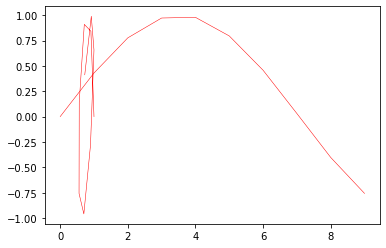

In [99]:
lines = plt.plot(x, y, np.cos(y), np.sin(x))
# use keyword args
plt.setp(lines, color='r', linewidth=0.5)
# or MATLAB style string value pairs
#plt.setp(lines, 'color', 'r', 'linewidth', 2.0)

**Here are the some available Line2D properties:**

|**Property**|**Value Type**|
|------|------|
|alpha|float|
|color or c|any matplotlib color|
|dash_capstyle|['butt' or 'round' or 'projecting']|
|dash_joinstyle|['miter' or 'round' or 'bevel']|
|dashes|sequence of on/off ink in points|
|data|(np.array xdata, np.array ydata)|
|label|any string|
|linestyle or ls| '-' or '--' or '-.' or ':' or 'steps' or ...|
|linewidth or lw|float value in points|
|marker|[ '+' or ',' or '.' or '1' or '2' or '3' or '4' ]|
|markeredgecolor or mec|any matplotlib color|
|markeredgewidth or mew|float value in points|
|markerfacecolor or mfc|any matplotlib color|
|markersize or mc|float|
|xdata|np.array|
|ydata|np.array|



To get a list of settable line properties, call the setp function with a line or lines as argument



In [101]:
plt.setp(lines)

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: scalar or None
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  contains: unknown
  dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
  dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style string, `~.path.Path` or `~.markers.MarkerStyle`
  markeredgecolor or mec: color
  markeredgewidth or mew: floa

## Working with multiple figures and axes